# Time Series: Split Date to Year, Month, and Day

Here's a time series dataset we can work with:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [163]:
import pandas as pd
import numpy as np
from datetime import datetime

## Data Import and Plot

In [167]:
csv_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

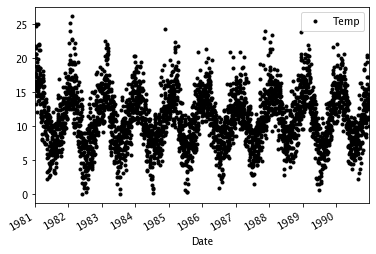

In [168]:
from pandas import read_csv
from matplotlib import pyplot
df = read_csv(csv_url, header=0, index_col=0, parse_dates=True, squeeze=False)
df.plot(style='k.')
pyplot.show()

In [80]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


## Feature Extraction for Year, Month, and Day

This is a naive feature extraction. It may be better to do one-hot encoding.

In [170]:
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Day"] = df.index.day
df

,Temp,Year,Month,Day
Date,,,,
1981-01-01,20.7,1981,1,1
1981-01-02,17.9,1981,1,2
1981-01-03,18.8,1981,1,3
1981-01-04,14.6,1981,1,4
1981-01-05,15.8,1981,1,5
...,...,...,...,...
1990-12-27,14.0,1990,12,27
1990-12-28,13.6,1990,12,28
1990-12-29,13.5,1990,12,29


Rearrange the column order.

In [171]:
cols = ['Year', 'Month', 'Day', 'Temp']
df = df[cols]; df

,Year,Month,Day,Temp
Date,,,,
1981-01-01,1981,1,1,20.7
1981-01-02,1981,1,2,17.9
1981-01-03,1981,1,3,18.8
1981-01-04,1981,1,4,14.6
1981-01-05,1981,1,5,15.8
...,...,...,...,...
1990-12-27,1990,12,27,14.0
1990-12-28,1990,12,28,13.6
1990-12-29,1990,12,29,13.5


# Multiple Linear Regression

In [134]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values

In [107]:
y = df['Temp']
X = np.array((df.index - df.index[0]).days).reshape(-1, 1)

In [108]:
X.shape

(3650, 1)

In [135]:
from sklearn import linear_model
model = linear_model.LinearRegression().fit(X, y)

In [155]:
sample = df.iloc[3000:3020,:-1]
y = df.iloc[3000:3020]
model.predict(sample), y

(array([12.37680748, 12.36168355, 12.34655962, 12.33143568, 12.31631175,
        12.30118782, 12.28606389, 12.27093996, 12.25581603, 12.2406921 ,
        12.38152283, 12.3663989 , 12.35127496, 12.33615103, 12.3210271 ,
        12.30590317, 12.29077924, 12.27565531, 12.26053138, 12.24540744]),
             Year  Month  Day  Temp
 Date                              
 1989-03-22  1989      3   22  16.9
 1989-03-23  1989      3   23  16.5
 1989-03-24  1989      3   24  13.6
 1989-03-25  1989      3   25  13.2
 1989-03-26  1989      3   26   9.4
 1989-03-27  1989      3   27   9.5
 1989-03-28  1989      3   28  11.8
 1989-03-29  1989      3   29  10.4
 1989-03-30  1989      3   30   9.7
 1989-03-31  1989      3   31  12.6
 1989-04-01  1989      4    1  13.3
 1989-04-02  1989      4    2  15.1
 1989-04-03  1989      4    3  14.2
 1989-04-04  1989      4    4  14.2
 1989-04-05  1989      4    5  19.2
 1989-04-06  1989      4    6  12.6
 1989-04-07  1989      4    7  14.2
 1989-04-08  1989     

In [116]:
df.iloc[9]

Temp    20.0
Name: 1981-01-10 00:00:00, dtype: float64